In [1]:
### Models should be auto-loaded in shell_plus kernel
# from tst.models import * 

In [1]:
# q = classification.objects.filter(Class=1,arch=10,topo=10,homsf=10,s35=0)
# classification.objects
classification.homsf_objects.count()
# homsf = classification.objects.exclude(homsf=0).filter(s35=0);
d = domain.objects.all()[0]
s = d.classification
sf = s.parent
homsf = sf.classification_set.all()

# homsf_list = 
# print(d.domain_stat)

In [11]:
try:
    del sys.modules[domain_stat_fill.__module__]
except: 
    pass


from tst.utils_db import *


import os

env =init_env()

try:
    d.domain_stat
except Exception as e:
    print(e)
domain_stat_null(d)
try:
    print d.domain_stat
except Exception as e:
    print(e)

    
# domain_stat_fill(d,env=env)    

try:
    domain_stat_fill(d,env = env)    
    print d.domain_stat
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(exc_type, fname, exc_tb.tb_lineno)



domain_stat object
domain_stat object


In [14]:
dir(enumerate([1,2]))


['__class__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'next']

In [15]:
from tst.utils_db import *
lst = domain.objects.all()
imax = len(lst)
for i,d in enumerate(lst):
    domain_stat_fill(d,env = env) 
    if not i % 100:
        print('%d of %d'%(i,imax))

0 of 21155
100 of 21155
200 of 21155
300 of 21155
400 of 21155
500 of 21155
600 of 21155
700 of 21155
800 of 21155
900 of 21155
1000 of 21155
1100 of 21155
1200 of 21155
1300 of 21155
1400 of 21155
1500 of 21155
1600 of 21155
1700 of 21155
1800 of 21155
1900 of 21155
2000 of 21155
2100 of 21155
2200 of 21155
2300 of 21155
2400 of 21155
read_pd_459W> Residue type  SEC not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.
2500 of 21155
2600 of 21155
2700 of 21155
2800 of 21155
2900 of 21155
3000 of 21155
3100 of 21155
3200 of 21155
3300 of 21155
3400 of 21155
3500 of 21155
3600 of 21155
3700 of 21155
3800 of 21155
3900 of 21155
4000 of 21155
4100 of 21155
4200 of 21155
4300 of 21155
4400 of 21155
4500 of 21155
4600 of 21155
4700 of 21155
4800 of 21155

In [110]:
domain.objects.get(domain_id = '4aimA04').classification

<classification: 2.40.50.140.147.0>

In [27]:
import matplotlib.pyplot as plt

import numpy as np

(0, 100)

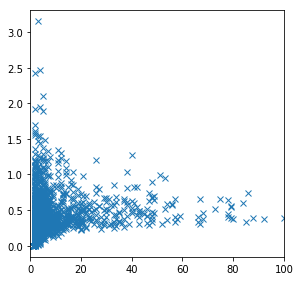

In [92]:
homsfs = classification.homsf_objects.all()
%matplotlib inline

xs = [];
ys = [];
for hom in homsfs:
    xs.append(hom.s35_count)
    ys.append(hom.nDOPE_std)
plt.close("all")
fig = plt.figure(figsize = [10,10])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax1.plot(xs,ys,'x',3)
ax1.set_xlim([0,100])
#     plot()

In [93]:
%matplotlib inline
homsfs = classification.homsf_objects.all().filter(s35_count__gte=100).order_by("-nDOPE_std")

In [126]:
%matplotlib inline
homsfs = classification.homsf_objects.all().filter(s35_count__lte=100,s35_count__gte=50).order_by("-nDOPE_avg")
# homsfs = classification.homsf_objects.all().filter(s35_count__gte=100)


print(len(homsfs))

34


In [119]:
len(homsfs)

34

In [6]:
#!/usr/bin/env python
from modeller import *
from modeller.scripts import complete_pdb

import argparse
import os
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
env = environ()
env.edat.dynamic_sphere = False
env.libs.topology.read(file='$(LIB)/top_heav.lib')
env.libs.parameters.read(file='$(LIB)/par.lib')
env.io.atom_files_directory = ['.','../atom_files','/home/shouldsee/Documents/repos/cathdb/domchop/pdbs/high_dope/']




read_to_681_> topology.submodel read from topology file:        3


In [143]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if not isinstance(points,np.ndarray):
        points = np.array(points)
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [144]:
# len(mdl.residues)
is_outlier([1,3,4,5])
# type(np.array([]))
# isinstance(np.array([1]),np.ndarray)

array([False, False, False, False], dtype=bool)

In [52]:
pdbfile = '2je6I02.pdb'

class pdb():
    def __init__(self,pdbfile = None):
        self.pdbfile = pdbfile
        self.DOPE_profile = None;
        self.nDOPE_profile = None
        self.pdbname = os.path.basename(pdbfile);
        
        if self.pdbname.split('.')[-1]=='pdb':    
            pass
        else:
            raise "not a valid .pdb file"
        self.mdl = complete_pdb(env, self.pdbfile)
        self.delim = "\n\n//Testing structure from %s, containing %d residues" % (self.pdbfile, len(self.mdl.residues))
#         if self.pdbname.split('.')[-1]=='pdb':
        
    def get_DOPE_profile(self):
        print(self.delim)
        #         print("\n\n//Testing structure from %s" % self.pdbfile)
        sel = selection(self.mdl)
        profile = sel.get_dope_profile()

        # profile = mdl.get_normalized_dope_profile()

        res_energy = [x.energy for x in profile];
        factor = 10 ** ( 
            int(
                np.log10(
                    max( 
                        (abs(x) for x in res_energy)
                        ) 
                    )
                - 3  
               )  + 1 
            )
        self.DOPE_profile = res_energy;
        msg = "%s got a DOPE of %f" % (self.pdbname, np.sum(self.DOPE_profile))
        print(msg)
    def get_DOPEhr_profile(self):
        print(self.delim)
        
#         print("\n\n//Testing structure from %s" % self.pdbfile)
        sel = selection(self.mdl)
        profile = sel.get_dopehr_profile()

        # profile = mdl.get_normalized_dope_profile()

        res_energy = [x.energy for x in profile];
        factor = 10 ** ( 
            int(
                np.log10(
                    max( 
                        (abs(x) for x in res_energy)
                        ) 
                    )
                - 3  
               )  + 1 
            )
        self.DOPEhr_profile = res_energy;
        msg = "%s got a DOPE of %f" % (self.pdbname, np.sum(self.DOPEhr_profile))
        print(msg)

    def get_nDOPE_profile(self):
        print(self.delim)
        
#         print("\n\n//Testing structure from %s" % self.pdbfile)
        
        profile = self.mdl.get_normalized_dope_profile()

        res_energy = [x.energy for x in profile];
        factor = 10 ** ( 
            int(
                np.log10(
                    max( 
                        (abs(x) for x in res_energy)
                        ) 
                    )
                - 3  
               )  + 1 
            )
        self.nDOPE_profile = res_energy;
        msg = "%s got an average nDOPE of %f" % (self.pdbname, np.mean(self.nDOPE_profile))
        print(msg)

    
# print(len(profile))

# np.sum(res_energy)

p1 = pdb('2je6I02.pdb')
p2 = pdb('4aimA04.pdb')
for p in [p1,p2]:
    p.get_DOPE_profile()
    p.get_nDOPE_profile()
np.sum(p1.DOPE_profile)



//Testing structure from 2je6I02.pdb, containing 88 residues
iatmcls_286W> MODEL atom not classified:  SER:OXT  SER
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().
2je6I02.pdb got a DOPE of -7407.044140


//Testing structure from 2je6I02.pdb, containing 88 residues
iatmcls_286W> MODEL atom not classified:  SER:OXT  SER
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().
2je6I02.pdb got an average nDOPE of 6.425335


//Testing structure from 4aimA04.pdb, containing 76 residues
iatmcls_286W> MODEL atom not classified:  GLN:OXT  GLN
preppdf_453W> No fixed restraints selected; there may be some dynamic ones.
preppdf_454W> Restraints file was probably not read; use restraints.append().
4aimA04.pdb got a DOPE of -4191.166530


//Testing structure from 4aimA04.pdb, containing 76 residue

-7407.0441402196884

In [73]:
# code =""
aln = alignment(env)
# mdl.read(file=code,model_segment=('FIRST:@','END:'))
code = p1.pdbfile
aln.append_model(p1.mdl,align_codes=code,atom_files=code)
code = p2.pdbfile
aln.append_model(p2.mdl,align_codes=code,atom_files=code)

# mdl.read(file=code,model_segment=('FIRST:@','END:'))
# aln.append_model(mdl,align_codes=code,atom_files=code)

aln.malign()
# for pos in aln.positions:
if 1:
    pos = aln.positions[10]
    obj = pos
    res1 = obj.get_residue(aln[0])
    res2 = obj.get_residue(aln[1])
    
    print(res1._num)
    print(res2._num)
    
    print(p1.DOPE_profile[(res1._num)])
    print(p2.DOPE_profile[(res2._num)])    


Multiple dynamic programming alignment (MALIGN):
  Residue-residue metric  : $(LIB)/as1.sim.mat
  ALIGN_BLOCK             :            1
  Gap introduction penalty:    -900.0000
  Gap extension penalty   :     -50.0000
  Length of alignment     :           88
10
5
-151.056945801
-42.8250465393


88
88
-6687.83621633
-4191.16653037


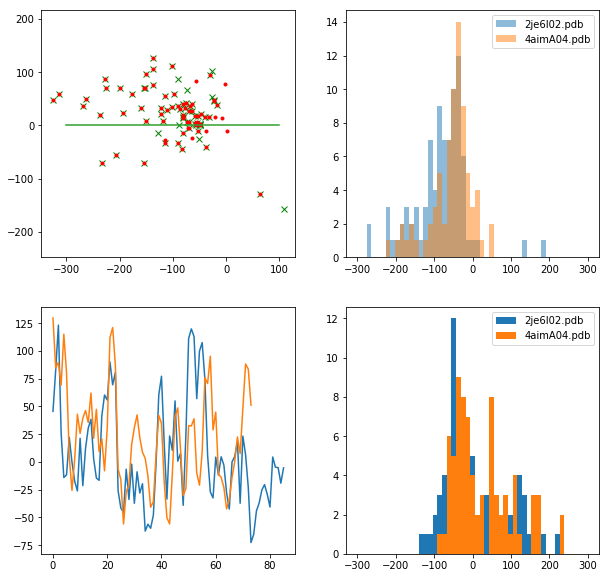

In [78]:
%matplotlib inline 
plt.close("all")
fig = plt.figure(figsize = [10,10])
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(222);
ax3 = fig.add_subplot(223);
ax4 = fig.add_subplot(224);
print len(p1.DOPE_profile)
print len(p1.nDOPE_profile)
# ax1.hist(p1.DOPE_profile,np.linspace(-300,300,100));
for p in [p1,p2]:
    label = p.pdbname
#     ax1.plot(p.DOPE_profile,p.nDOPE_profile,'x',2,label = p.pdbname)
    ax2.hist(p.DOPE_profile,np.linspace(-300,300,50), label = p.pdbname,alpha = 0.5);
    smt_pf = np.convolve(p.nDOPE_profile, [1./3 for x in range(3)],'valid');
    ax3.plot(smt_pf, label = label)
    
#     ax3.plot(p.nDOPE_profile, label = label)
    ax4.hist(p.nDOPE_profile,np.linspace(-300,300,50), label = p.pdbname);

p.DOPE_profile
# ax1.plot(p.DOPE_profile,p.nDOPE_profile,'x',2,label = p.pdbname)

# if 1:
#     pos = aln.positions[10]
#     obj = pos
sx = 0;
sy = 0;
xs = [];
ys = [];
# for pos in aln.positions:
#     res1 = pos.get_residue(aln[0])
#     res2 = pos.get_residue(aln[1])
#     if res1 and res2:
#         rnum1 = res1._num
#         rnum2 = res2._num
for pos in positions:
    res1 = pos[0]
    res2 = pos[1]
    
    if res1[0] and res2[0]:
        rnum1 = res1[0];
        rnum2 = res2[0];
        dp1 = p1.DOPE_profile[(rnum1)]
        dp2 = p2.DOPE_profile[(rnum2)]
        x = (dp1+dp2)/np.sqrt(2);
        y = (dp2-dp1)/np.sqrt(2);
        xs += [x];
        ys += [y];
#         ax1.plot(x,y,'gx',2)
        sx += dp1;
        sy += dp2;
ax1.plot(xs,ys,'gx',2)

sx = 0;
sy = 0;
xs = [];
ys = [];
for pos in aln.positions:
    res1 = pos.get_residue(aln[0])
    res2 = pos.get_residue(aln[1])
    if res1 and res2:
        rnum1 = res1._num
        rnum2 = res2._num
        dp1 = p1.DOPE_profile[(rnum1)]
        dp2 = p2.DOPE_profile[(rnum2)]
        x = (dp1+dp2)/np.sqrt(2);
        y = (dp2-dp1)/np.sqrt(2);
        xs += [x];
        ys += [y];
#         ax1.plot(x,y,'gx',2)
        sx += dp1;
        sy += dp2;
ax1.plot(xs,ys,'r.',1)
# print(len(positions))
# xs =
print(sx)
print(sy)
ax1.plot([-300,100],[0,0])
ax1.axis('equal')
ax1.legend()
ax2.legend()
ax4.legend()

In [ ]:
def scatterplot_dict_overlap(xs1,y2s1,ids1,xs2,y2s2,ids2, colors = None,lbls=None, forced_lbls=None, regress = True, show = False,**kwargs):   
#     if not lbls:
#         lbls = ids
    # if forced_lbls:
    #     lbls = forced_lbls
    #     print( "lbls settled")
    # print( "lbls not settled")

    # font = {'family' : 'normal',
    #     'weight' : 'bold',
    #     'size'   : 16}
    # # matplotlib.rc('font', **font)
    SMALL_SIZE = 12
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 18
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    # plt.rc('axes', titleweight='bold')    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.weight'] = 10
    # plt.rcParams['font.size'] = 10
    # plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['text.usetex']=False
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titleweight'] = 'bold'


    idx = [not (x is None or y is None) for x,y in zip(xs2,y2s2)]
    xs = [x for x,y in zip(xs2,idx) if y]
    y2s = [x for x,y in zip(y2s2,idx) if y]
    ids = [x for x,y in zip(ids2,idx) if y]
    
#     lbls=ids2
#     xs = np.array(xs);
#     y2s = np.array(y2s)
    # 
    # xs = xs.flat[idx]
    # print(len(idx))
    # y2s = y2s.flat[idx]
    # ids = [x for x,y in zip(ids,idx) if y]
    # lbls = lbls[idx]
    
    msg = '';
    plt.close()
    siz = [450,400]
    DPI=100.
    fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
    ax1 = fig.add_subplot(111,**kwargs)
    points = ax1.scatter(xs,y2s, 
        # colors,
#         edgecolor = 'b',facecolor = 'b',
        edgecolor = 'r',facecolor = 'r',
        marker ='o',
        c = colors,
         s =100,
         alpha = 0.35,
         # **kwargs
         )
    # if 1:
    
    
    idx = [not (x is None or y is None) for x,y in zip(xs1,y2s1)]
    xs = [x for x,y in zip(xs1,idx) if y]
    y2s = [x for x,y in zip(y2s1,idx) if y]
    ids = [x for x,y in zip(ids1,idx) if y]
#     lbls=ids1
    xs = np.array(xs);
    y2s = np.array(y2s)
    # 
    # xs = xs.flat[idx]
    # print(len(idx))
    # y2s = y2s.flat[idx]
    # ids = [x for x,y in zip(ids,idx) if y]
    # lbls = lbls[idx]
    
#     msg = '';
#     plt.close()
#     siz = [450,400]
#     DPI=100.
#     fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
#     ax1 = fig.add_subplot(111,**kwargs)
    points = ax1.scatter(xs,y2s, 
        # colors,
        edgecolor = 'b',facecolor = 'b',
        # edgecolor = 'r',facecolor = 'r',
        marker ='o',
        c = colors,
         s =100,
         alpha = 0.35,
         # **kwargs
         )
    # if 1:
    
    
    title = ''
    if regress:
        ((m,b),C) = np.polyfit(xs, y2s, 1, cov =True) ### This covariance seems different from the one generated by np.cov()
        # (m,b) = np.polyfit(xs, y2s, 1, cov = False)
        C = np.cov(xs,y2s)
        r_sq = cov2corr(C).flat[1] ** 2
  
        res2  = y2s - ( m*xs + b)
        outs = MAD_outlier(res2,3.0)
        outs = (outs * (res2<0));
        xso = xs[outs]
        y2so = y2s[outs]
        sc1 = ax1.scatter(xso,y2so,s=33,
            color='r',
            marker = 'x',
            label='outlier num = %d'%sum(outs))

        title += '''
        y  = %5.3f * x + %5.3f , 
        R_squared=%3.3f '''% (m,b,r_sq)
        xmm = np.array([min(xs),max(xs)])
        ax1.plot(xmm, m*xmm + b, 'g--',label = 'linear regression fit')

    oxlim = ax1.get_xlim()
    oylim = ax1.get_ylim()
    ax1.axis('auto')
    axlim = ax1.get_xlim()
    aylim = ax1.get_ylim()
    ax1.set_xlim(oxlim)
    ax1.set_ylim(oylim)

    ax1.legend()
    
    # ax1.legend(bbox_to_anchor=(1.1, 1.05))
    ax1.set_title(
        title)

    ax1.grid(True, which='both')
    plt.tight_layout()
 
    tooltip = mpld3.plugins.PointLabelTooltip(points, labels=lbls)
    mpld3.plugins.connect(fig, tooltip)
    mpld3.plugins.connect(fig, HelloWorld(points,lbls,ids))
    mpld3.plugins.connect(fig, RectPlugin(xlim=axlim,ylim=aylim))
    jdict = mpld3.fig_to_dict(fig);
    jstr = json.dumps(jdict);

    if show:
        mpld3.show()
    else:
        plt.close(fig)
        # fig.show()
        # plt.close("all")
    return(jdict)

In [79]:
#### Overlapping plot

### plotting mahalanobis distance
# del scatterplot_dict.__module__
# from tst.utils import *
# from tst.views import *
from matplotlib import pyplot as plt
dom1="3.30.497.10"
dom2="2.30.39.10"

sf1 = classification.objects.get_bytree(dom1)[0]
sf2 = classification.objects.get_bytree(dom1)[0]
fields=[			'domain_stat__atom_count',
			'domain_stat__nbpair_count',
			'id',
]

fields = [
			'domain_stat__pcx',
			'domain_stat__pcy',
			'id',
			]
xss=[];yss=[];lblss=[];css=[]


# msg = '';
# plt.close()
# siz = [450,400]
# DPI=100.
# fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
# ax1 = fig.add_subplot(111)
# # points = ax1.scatter(xs,y2s, colors,

sset = homsf2domain(dom1)



(xs,ys,lbls)=zip(*sset.values_list(*fields))
                     
# xss+=xs
# yss+=ys
# lblss+=lbls
# css+=len(xs)*[0]
xss+=[xs]
yss+=[ys]
lblss+=[lbls]
css+=[len(xs)*[0]]

# ax1.scatter(xs,ys,color=1)

sset = homsf2domain(dom2)
                     
(xs2,ys2,lbls2)=zip(*sset.values_list(*fields))
# 
xss+=[xs2]
yss+=[ys2]
lblss+=[lbls2]
css+=[len(xs2)*[2]]

# ax1.scatter(xs,ys,color=2)

# lsts = zip(*sset.values_list('parent__node_stat__Rsq_NBcount_Acount','domain__domain_stat__maha_dist','id'))
# scatterplot_dict(*lsts, regress=0, show = 1)

# subplot_kwargs = {
# 			# 'xlim':[0,500],
# 			'xlim':[0,500E1],
# 			'ylim':[0,800E3],
# 			'xlabel':'atom_count',
# 			'ylabel':'Non-bonding pair count',
# 			},

subplot_kwargs={
			'xlim':[-5,10],
			'ylim':[-9,7],
			'xlabel': 'pcx (relative structure size)',
			'ylabel': 'pcy (packedness)',
# 			"regress":False,
			}

scatterplot_dict_overlap(xs,ys,lbls,
                 xs2,ys2,lbls2,
                 regress = 0, show = 1   , 
                 **subplot_kwargs
                );


1765.41206533


In [69]:
print rnum2
len(p2.DOPE_profile)

68


76

In [45]:
if [None,None]:
    print('hi')
# print(rnum2)
res2

hi


[622, 622]

In [44]:
# type(19 and None)
100 and 19

19

In [26]:
if int('0'):
    print('0')

In [61]:
# help(aln[0])
# dir(aln[0])
aln[0].atom_file
import os

def ssap(pdbfile1,pdbfile2):
    print os.environ['CATH_TOOLS_ALN_PATH']
    exec()
reload(os)
print os.environ['CATH_TOOLS_ALN_PATH']
bashCommand = "cath-ssap %s %s --aligndir %s" %(p1.pdbname,p2.pdbname,os.environ['CATH_TOOLS_ALN_PATH'] )
import subprocess
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output)
positions = [];

with open(os.path.join(os.environ['CATH_TOOLS_ALN_PATH'],p1.pdbname + p2.pdbname +'.list')) as f:
    line = f.readline();
    res1 = -1;
    res2 = -1;
    while line:
        line = line.rstrip('\n')
#         print(line.split())
        lst = line.split(); 
        print(lst[0],lst[4],lst[-1])
        line = f.readline();
        
        col1 = int(lst[0]);
        colm = int(lst[4]);
        col2 = int(lst[-1]);
        if col1:
            res1 += 1;
            res1a = res1;
        else:
            col1 = None;
            res1a= None
        if col2:
            res2 += 1;
            res2a = res2;
        else:
            col2 = None;
            res2a= None;
        positions.append([[res1a ,col1],
                          [res2a ,col2],
                          colm,
                         ])
        
# f.open()
# from modeller import *
# modeller.sequence.Sequence
# sequence.Sequence()

/home/shouldsee/Documents/repos/cathdb/domchop/pdbs/alignments
2je6I02.pdb  4aimA04.pdb   88   76  81.35   76   86   21   2.89

('65', '0', '0')
('66', '0', '0')
('67', '0', '0')
('68', '0', '0')
('69', '23', '621')
('70', '24', '622')
('71', '23', '623')
('72', '10', '624')
('73', '0', '0')
('74', '36', '625')
('75', '41', '626')
('76', '50', '627')
('77', '59', '628')
('78', '59', '629')
('79', '65', '630')
('80', '80', '631')
('81', '77', '632')
('82', '66', '633')
('83', '69', '634')
('84', '58', '635')
('85', '45', '636')
('86', '29', '637')
('87', '64', '638')
('88', '73', '639')
('89', '71', '640')
('90', '67', '641')
('91', '65', '642')
('92', '52', '643')
('93', '46', '644')
('94', '22', '645')
('95', '4', '646')
('96', '25', '647')
('97', '56', '648')
('98', '54', '649')
('99', '56', '650')
('100', '61', '651')
('101', '47', '652')
('102', '42', '653')
('103', '40', '654')
('104', '42', '655')
('105', '45', '656')
('106', '18', '657')
('107', '27', '658')
('108', '14', '659')

In [48]:
15 and 100

100

In [37]:
None or False

False

In [28]:
bool(10)+5

6

In [172]:
# help(aln)
# aln.consensus(gap_penalties_1d=(0, 0.4), align_block=1)
# aln.consensus(aln[0],aln[1])
obj = aln.positions[0]
aln.check()
# dir(obj)
obj.get_residue(aln[0])
# obj.num
# aln[0].get_num_equiv()
# help(obj)
# obj.get_residue()


check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
     66     1   52    56      V     L    8.528
     97     1   83    88      D     Q   11.532
END OF TABLE


Residue 1:I (type GLY)

In [92]:
env.io.atom_files_directory = ['.','../atom_files',input_dir]


# dir()
# from django.db.models import Avg,StdDev
# Variance()

NameError: name 'input_dir' is not defined

In [9]:
from django.db.models import Avg,StdDev
homsf_qset = classification.homsf_objects; 
homsf_qset = (homsf_qset.annotate(nDOPE_std=StdDev("classification__domain__nDOPE"))
              .annotate(nDOPE_avg=Avg("classification__domain__nDOPE"))
              .annotate(s35_count=Count("classification__parent__classification"))
             )

# homsf.count()
# domain.objects

In [11]:
homsf_list = classification.homsf_objects.filter( Q( nDOPE_avg>1.0 ) | Q( nDOPE_std>0.1 ))
homsf_list.count()

NameError: name 'nDOPE_avg' is not defined

In [8]:
# from django.conf.urls.static import static
from django.templatetags.static import static
static("imgs/rasamol.png")

'/static/imgs/rasamol.png'

In [2]:
from tst import views
# reverse(views.homsf_s35_collection,args = {"homsf_id":1})
reverse('domain_collection',args=['1.3.4.5'])



# help(reverse)

u'/tst/superfamily/1.3.4.5/'

In [10]:
homsf_qset = classification.homsf_objects.order_by("-s35_count","-nDOPE_avg");
homsf_qset[0].__dict__
# print(homsf_qset.manager)

{'Class': 2L,
 '_state': <django.db.models.base.ModelState at 0x7ff7f4300a50>,
 'arch': 60L,
 'homsf': 10L,
 'id': 309449L,
 'level_id': 5L,
 'nDOPE_avg': -1.3932344727840804,
 'nDOPE_std': 0.5276587358829742,
 'parent_id': 312905L,
 's100': 0L,
 's35': 0L,
 's35_count': 495616,
 's60': 0L,
 's95': 0L,
 'topo': 40L,
 'version_id': 1L}

In [9]:
d = domain.objects.all()[0]
hasattr(d,'superfamily')
getattr(d,'superfamily')

<bound method domain.superfamily of <domain: domain object>>

In [11]:
homsf_qset.__dict__

{'_db': None,
 '_fields': None,
 '_for_write': False,
 '_hints': {},
 '_iterable_class': django.db.models.query.ModelIterable,
 '_known_related_objects': {},
 '_prefetch_done': False,
 '_prefetch_related_lookups': (),
 '_result_cache': None,
 '_sticky_filter': False,
 'model': tst.models.classification,
 'query': <django.db.models.sql.query.Query at 0x7ff60c186b10>}

In [4]:
q = classification.objects.filter(Class=1,arch=20,topo=5,homsf=590,s35=0)

In [23]:
# dir(homsf_qset)
# homsf_qset.as_manager()

In [15]:
homsf_qset.model.__dict__

dict_proxy({'Class': <django.db.models.query_utils.DeferredAttribute at 0x7ff60c396290>,
            'DoesNotExist': tst.models.DoesNotExist,
            'MultipleObjectsReturned': tst.models.MultipleObjectsReturned,
            '__doc__': u'classification(id, Class, arch, topo, homsf, s35, s60, s95, s100, version, level, parent)',
            u'__module__': 'tst.models',
            '__str__': <function tst.models.__str__>,
            '_meta': <Options for classification>,
            'arch': <django.db.models.query_utils.DeferredAttribute at 0x7ff60c396250>,
            'classification_set': <django.db.models.fields.related_descriptors.ReverseManyToOneDescriptor at 0x7ff60c396410>,
            'domain_set': <django.db.models.fields.related_descriptors.ReverseManyToOneDescriptor at 0x7ff60c396d50>,
            'find_depth': <function tst.models.find_depth>,
            'get_s35cnt': <function tst.models.get_s35cnt>,
            'homsf': <django.db.models.query_utils.DeferredAttribute

In [45]:
from time import time
from django.db import transaction

#     if 1:
if h.level.letter == 'H':
    pass
else:
    print "Node %s is not filled because it is not a homsf, but a '%s'" % (str(h),h.level.letter)


try:
    nstat = h.node_stat
except:
    nstat = node_stat(node = h)
    nstat.save()

hset  = h.classification_set;


### Compute statistics only if the set is larger than 10
if hset.count() > 10:
    hset = hset.annotate(Acount=Avg("domain__domain_stat__atom_count"))
    hset = hset.annotate(Rcount=Avg("domain__domain_stat__res_count"))
    hset = hset.annotate(NBcount=Avg("domain__domain_stat__nbpair_count"))

#     hset.domain
    l = hset.values_list('Acount','Rcount','NBcount')
    a = np.array(l)
    sa = a
#     sa = np.vstack([a[:,0],a[:,2]]).T ### Using only 'Acount' and 'NBcount', discard 'Rcount'
    c = np.cov(sa.T)
    C = cov2corr(c); ## utils.cov2corr

    cinv = np.linalg.inv(c)
    mu = np.mean(sa, axis = 0)


    sset = hset ### rename to sset ,aka "s35_set"
#     qset = domain_stat.objects.none()
    qlst = []

    t0 = time()


    for s,pt in zip( sset ,sa):
        dstat = s.domain.domain_stat
        md = maha_dist( pt, mu, cinv)
        dstat.maha_dist = md
#         print(s.domain)
#         print(dstat)
#         print(md)
#             qlst.append(dstat)
#         dstat.save()



    t1 = time()
    with transaction.atomic():
#     if 1:
        for s,pt in zip( sset ,sa):
            dstat = s.domain.domain_stat
            md = maha_dist( pt, mu, cinv)
            dstat.maha_dist = md
            dstat.save()

#     dstat_set = domain_stat.objects.filter(domain__in= hset.values_list('domain',flat = True))
#     for dstat,pt in zip( dstat_set ,sa):
# #             dstat = s.domain.domain_stat
#         md = maha_dist( pt, mu, cinv)
#         dstat.maha_dist = md
#     dstat_set.update()


    t2 = time()

print(t1-t0)
print(t2-t1)


0.187651157379
0.0800468921661


In [46]:
h = classification.objects.get_bytree('1.10.30.10')[0]
hset = h.classification_set.all()
dstat = domain_stat.objects.filter(domain__in= hset.values_list('domain',flat = True))[0]

print dstat.maha_dist


0.898871043506


In [43]:
dstat.maha_dist = None
dstat.save()

In [1]:
from tst.utils_db import *
h = classification.objects.get_bytree('1.10.30.10')[0]


def maha_dist(pt, mu, cinv):
    dd = pt - mu
    md = dd.T.dot( cinv.dot( dd))
    return md
        
def homsf_stat_fill(h):
#     if 1:
    if h.level.letter == 'H':
        pass
    else:
        print "Node %s is not filled because it is not a homsf, but a '%s'" % (str(h),h.level.letter)


    try:
        nstat = h.node_stat
    except:
        nstat = node_stat(node = h)
        nstat.save()

    hset  = h.classification_set;


    ### Compute statistics only if the set is larger than 10
    if hset.count() > 10:
        hset = hset.annotate(Acount=Avg("domain__domain_stat__atom_count"))
        hset = hset.annotate(Rcount=Avg("domain__domain_stat__res_count"))
        hset = hset.annotate(NBcount=Avg("domain__domain_stat__nbpair_count"))

    #     hset.domain
        l = hset.values_list('Acount','Rcount','NBcount')
        a = np.array(l)
        sa = a
    #     sa = np.vstack([a[:,0],a[:,2]]).T ### Using only 'Acount' and 'NBcount', discard 'Rcount'
        c = np.cov(sa.T)
        C = cov2corr(c); ## utils.cov2corr

        cinv = np.linalg.inv(c)
        mu = np.mean(sa, axis = 0)

        dstat_set = hset.values_list('domain',flat = True)

        sset = hset ### rename to sset ,aka "s35_set"
    #     qset = domain_stat.objects.none()
        qlst = []

        for s,pt in zip( sset ,sa):
            dstat = s.domain.domain_stat
            md = maha_dist( pt, mu, cinv)
            dstat.maha_dist = md
    #         print(s.domain)
    #         print(dstat)
    #         print(md)
            qlst.append(dstat)
    #         dstat.save()
    #     qset = list(chain(qset , [dstat]))

    #         print type(qset)

        nstat.Rsq_NBcount_Acount = C[0,2] ** 2
        nstat.Rsq_NBcount_Rcount = C[1,2] ** 2
    else:
        nstat.Rsq_NBcount_Acount = None
        nstat.Rsq_NBcount_Rcount = None
        qlst = []

    # help(qset.save)

    # qset.save()
    try:
        nstat.save()
        for q in qlst:
            q.save()
#         print 'success'
        return 1
    except Exception as e:
#         print nstat.__dict__
        print 'failed for ', str(e)
        return 0